# Multi-Class Classification

## Objectives:

  * Create a deep neural network that performs multi-class classification.
  * Tune the deep neural network.


## About the Dataset.
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized). 

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a rater.  Each label must be an integer from 0 to 9.  
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes.

## Importing modules

In [104]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# adjust the granularity
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# improves formatting when ouputting NumPy arrays
np.set_printoptions(linewidth = 200)

## Loading the dataset

In `tf.keras` the function for importing MNIST dataset is called `mnist.load_data()`:

In [105]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

#### MNIST dataset is already shuffled.

## Exploring the dataset

The .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. 

In [106]:
# example #1923 of the training set.
x_train[1918]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 171, 253, 133,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 125, 252, 252, 247,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6, 160, 252, 252, 252, 211,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 252, 252, 210, 108, 190,   0,   0,   0,   0,   0,   0,   0

In [107]:
x_train.shape 

(60000, 28, 28)

using `matplotlib.pyplot.imshow` to interpret the array as an image. 

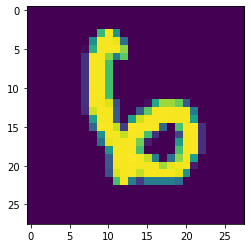

In [108]:
plt.imshow(x_train[1918])

In [109]:
# 5th row of example 1918
x_train[1918][5]

array([  0,   0,   0,   0,   0,   0,   0,   6, 160, 252, 252, 252, 211,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [110]:
# 19th pixel of row 5 of example 1918
x_train[2917][10][19]

11

## Normalizing feature values

In [111]:
x_train_normalized = x_train / 255.00
x_test_normalized = x_test / 255.00
print(x_train_normalized[1918][5]) 

[0.         0.         0.         0.         0.         0.         0.         0.02352941 0.62745098 0.98823529 0.98823529 0.98823529 0.82745098 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


## Defining a plotting function

In [112]:
""" curve of one or more classification metrics vs epoch """ 
def plot_curve(epochs, hist, list_of_metrics): 

# METRICS = [
#      keras.metrics.TruePositives(name='tp'),
#      keras.metrics.FalsePositives(name='fp'),
#      keras.metrics.TrueNegatives(name='tn'),
#      keras.metrics.FalseNegatives(name='fn'), 
#      keras.metrics.BinaryAccuracy(name='accuracy'),
#      keras.metrics.Precision(name='precision'),
#      keras.metrics.Recall(name='recall'),
#      keras.metrics.AUC(name='auc'),
#   ]

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

## Creating a deep neural net model

The `create_model` function defines the topography of the model:

* The number of layers in the deep neural net.
* The number of nodes in each layer.
* regularization of layers.

The `create_model` function also defines the activation function of each layer.  The activation function of the output layer is softmax, which will give 10 different outputs for each example.

In [113]:
def create_model(my_learning_rate):
  
  model = tf.keras.models.Sequential()

    
  # converting two-dimensional 28x28 array into a one-dimensional 
  # 784 element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))


  # first hidden layer  
  model.add(tf.keras.layers.Dense(units=20, activation='relu'))
  
  # second hidden layer
  model.add(tf.keras.layers.Dense(units=10, activation='relu'))
    
  # dropout regularization layer 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # output layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # compiling the model  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


""" Train the model """
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

## Training the model

In [114]:
import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#suppressing warnings

Epoch 1/50
12/12 [==============================] - 0s 13ms/step - loss: 2.2236 - accuracy: 0.1914 - val_loss: 2.0753 - val_accuracy: 0.2909
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 2.0115 - accuracy: 0.2918 - val_loss: 1.8384 - val_accuracy: 0.4392
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.8145 - accuracy: 0.3811 - val_loss: 1.6119 - val_accuracy: 0.5561
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 1.6535 - accuracy: 0.4578 - val_loss: 1.4225 - val_accuracy: 0.6425
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 1.5132 - accuracy: 0.5259 - val_loss: 1.2548 - val_accuracy: 0.7176
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 1.3767 - accuracy: 0.5722 - val_loss: 1.1034 - val_accuracy: 0.7773
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 1.2727 - accuracy: 0.6187 - val_loss: 0.9875 - val_accuracy: 0.7993
Epoch 8/50
12/12 [=

[0.28058871626853943, 0.927299976348877]

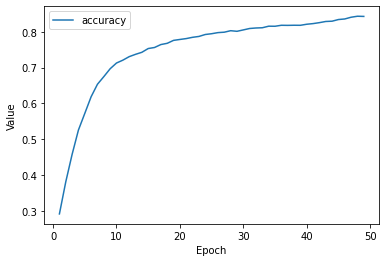

In [115]:
learning_rate = 0.001
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = None


# model's topography.
my_model = create_model(learning_rate)


epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)


list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)


print("\n Evaluating the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

## Optimizing the model

Let's try to reach at least 98% accuracy against the test set

In [122]:
def create_model(my_learning_rate):
  
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))


  """ Increasing nodes increased accuracy """            # <--------------------  
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  
  """ Adding a second layer decreased loss """           # <--------------------
  model.add(tf.keras.layers.Dense(units=127, activation='relu'))
    
 
  model.add(tf.keras.layers.Dropout(rate=0.2))


  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           

  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


""" Train the model """
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/60
12/12 [==============================] - 0s 13ms/step - loss: 1.5717 - accuracy: 0.5836 - val_loss: 0.7117 - val_accuracy: 0.8388
Epoch 2/60
12/12 [==============================] - 0s 6ms/step - loss: 0.5979 - accuracy: 0.8247 - val_loss: 0.3529 - val_accuracy: 0.9001
Epoch 3/60
12/12 [==============================] - 0s 6ms/step - loss: 0.3901 - accuracy: 0.8834 - val_loss: 0.2781 - val_accuracy: 0.9217
Epoch 4/60
12/12 [==============================] - 0s 6ms/step - loss: 0.3114 - accuracy: 0.9085 - val_loss: 0.2380 - val_accuracy: 0.9308
Epoch 5/60
12/12 [==============================] - 0s 6ms/step - loss: 0.2666 - accuracy: 0.9235 - val_loss: 0.2095 - val_accuracy: 0.9400
Epoch 6/60
12/12 [==============================] - 0s 6ms/step - loss: 0.2309 - accuracy: 0.9330 - val_loss: 0.1892 - val_accuracy: 0.9454
Epoch 7/60
12/12 [==============================] - 0s 6ms/step - loss: 0.2068 - accuracy: 0.9402 - val_loss: 0.1708 - val_accuracy: 0.9501
Epoch 8/60
12/12 [=

[0.07239113003015518, 0.9811000227928162]

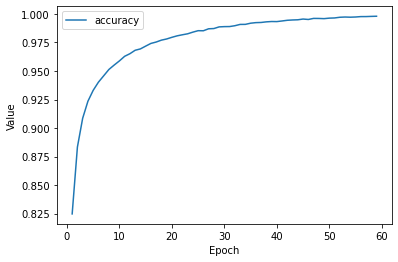

In [123]:
learning_rate = 0.001
epochs = 60
batch_size = 4000
validation_split = 0.2

my_model = None


# model's topography.
my_model = create_model(learning_rate)


epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)


list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)


print("\n Evaluating the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

### Reached 98.1% test accuracy with the following configuration:
   * First hidden layer of 256nodes 
   * second hidden layer of 127 nodes
   * dropout regularization rate of 0.2
   * epochs = 60, batch_size = 4000

